## Working with dictonaries

In [2]:
# Creating a dict, key/value pair

audio = {'amp':'Linn', 'preamp':'Luxman', 'speakers':'Energy',
'ic':'Crystal Ultra', 'pc':'JPS', 'power':'Equi-Tech',
'sp':'Crystal Ultra', 'cdp':'Nagra', 'up':'Esoteric'}

print(audio)

{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra', 'up': 'Esoteric'}


In [6]:
# Adding item
audio['up'] = 'Amps'
print(audio)

# Deleting items
del audio['up']
print(audio)



{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra', 'up': 'Amps'}
{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra'}


In [13]:
# Dict to list conversion
audio_list = [audio]
print(audio_list)

video = {'tv':'LG 65C7 OLED', 'stp':'DISH', 'HDMI':'DH Labs',
'cable' : 'coax'}
print(video)

# Append audio list to videos
audio_list.append(video)
print(audio_list)

print("\nOne th element in list")
print(audio_list[0])
print(audio_list[1])

[{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra'}]
{'tv': 'LG 65C7 OLED', 'stp': 'DISH', 'HDMI': 'DH Labs', 'cable': 'coax'}
[{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra'}, {'tv': 'LG 65C7 OLED', 'stp': 'DISH', 'HDMI': 'DH Labs', 'cable': 'coax'}]

One th element in list
{'amp': 'Linn', 'preamp': 'Luxman', 'speakers': 'Energy', 'ic': 'Crystal Ultra', 'pc': 'JPS', 'power': 'Equi-Tech', 'sp': 'Crystal Ultra', 'cdp': 'Nagra'}
{'tv': 'LG 65C7 OLED', 'stp': 'DISH', 'HDMI': 'DH Labs', 'cable': 'coax'}


## Working with files

In [15]:
import random, time, csv

# read csv files
def read_csv(file, headers):
    input_file = csv.DictReader(open(file), fieldnames=headers)
    return (input_file)



# Working with MongoDB

In [24]:
# Connecting to mongodb
import json, csv, sys, os
sys.path.append(os.getcwd()+'/classes')
import conn

def read_dict(f, h):
    input_file = csv.DictReader(open(f), fieldnames=h)
    return (input_file)

def conv_reg_dict(d):
    return [ dict(x) for x in d]

def dump_json(f, d):
    with open(f, 'w') as f:
        json.dump(d, f)
        
def read_json(f):
    with open(f) as f:
        return json.load(f)
    
if __name__ == '__main__':
    f = 'data/names.csv'
    headers = ['first', 'last']
    r_dict = read_dict(f, headers)
    dict_ls = conv_reg_dict(r_dict)
    json_file = 'data/names.json'
    dump_json(json_file, dict_ls)
    
    data = read_json(json_file)
    obj = conn.conn('test')
    db = obj.getDB()
    names = db.names
    names.drop()
    
    for i, row in enumerate(data):
        row['_id'] = i
        names.insert_one(row)
        
    n = 3
    print('1st ', n , 'names')
    people = names.find()
    for i, row in enumerate(people):
        if i < n:
            print(row)
        people.rewind()
        
        print('\n 1st ', n, ' names with rewind:')
        for i, row in enumerate(people):
            if i < n:
                print(row)
        print ('\nquery 1st', n, 'names')
        first_n = names.find().limit(n)
        for row in first_n:
            print(row)
        print ('\nquery last', n, 'names')
        length = names.find().count()
        last_n = names.find().skip(length - n)
        for row in last_n:
            print(row)
        fnames = ['Ella', 'Lou']
        lnames = ['Vader', 'Pole']
        print ('\nquery Ella:')
        query_1st_in_list = names.find( {'first':{'$in':[fnames[0]]}})
        for row in query_1st_in_list:
            print(row)
        print ('\nquery Ella or Lou:')
        query_1st = names.find( {'first':{'$in':fnames}} )
        for row in query_1st:
            print(row)
        print ('\nquery Lou Pole:')
        query_and = names.find( {'first':fnames[1], 'last':lnames[1]} )
        for row in query_and:
            print(row)
        print ('\nquery first name Ella or last name Pole:')
        query_or = names.find( {'$or':[{'first':fnames[0]},{'last':lnames[1]}]} )
        for row in query_or:
            print(row)
        pattern = '^Sch'
        print ('\nquery regex pattern:')
        query_like = names.find( {'last':{'$regex':pattern}} )
        for row in query_like:
            print(row)
        pid = names.count()
        doc = {'_id':pid, 'first':'Wendy', 'last':'Day'}
        names.insert_one(doc)
        print ('\ndisplay added document:')
        q_added = names.find({'first':'Wendy'})
        print (q_added.next())
        print ('\nquery last n documents:')
        q_n = names.find().skip((pid-n)+1)
        for _ in range(n):
            print (q_n.next())

ModuleNotFoundError: No module named 'conn'

# Monte Carlo Simulations

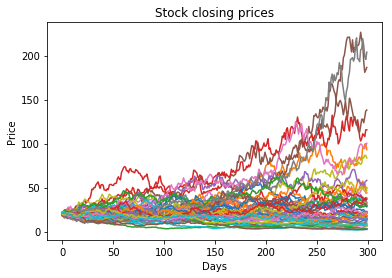

In [37]:
import matplotlib.pyplot as plt
import numpy as py
from scipy import stats

def cum_price(p,d,m,s):
    data = []
    for d in range(d):
        prob = stats.norm.rvs(loc=m, scale=s)
        price = (p * prob)
        data.append(price)
        p = price;
    return data;

if __name__ == "__main__":
    stk_price, days, mean, s = 20, 300, 1.001, 0.05
    for i in range(50):
        data = cum_price(stk_price, days, mean, s)
        plt.plot(data)
    plt.ylabel('Price')
    plt.xlabel('Days')
    plt.title('Stock closing prices')
    plt.show()